In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

 1.1					 'Colab Notebooks'
 1.2					 'CSE 2K18.pdf'
 1807113.rar				 'CSE 3-1'
 2-1					  I.2
 2-2					 'Kanzul Iman'
 30.6.19				  M
 3.1					  Mobarak_Physics_KUET.pdf
'3.1 (1)'				  nid-6015431650.pdf
 3200					 'Saved Models'
'3-2 class recording'			 'Shared 3-1'
'Al-Mamun 300 px X 300 px.jpg'		 'Shared 3-2'
'assignment on number system_final.pdf'  'Vaccine Certificate .pdf'


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam



train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.5,
        horizontal_flip=True,
        brightness_range=[1.0,2.0],
        #validation_split=0.5
        )
train_generator = train_datagen.flow_from_directory(
        r'/content/drive/MyDrive/3200/AZ/Alzheimer_s Dataset/train',
        target_size=(200,200),
        color_mode='grayscale',
        batch_size=64,
        shuffle=True,
        class_mode='categorical',
        seed=42,
        #subset="training",
        #save_to_dir=r'C:\Users\Mahmudul Hasan\AppData\Local\Programs\Python\Python38\Scripts\training set\cars',
        #save_prefix='',
        #save_format='png'
        )

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
        r'/content/drive/MyDrive/3200/AZ/Alzheimer_s Dataset/val',
        target_size=(200,200),
        color_mode='grayscale',
        batch_size=64,
        class_mode='categorical',
        shuffle=True,
        seed=42,
        #subset="training",
        #save_to_dir=r'C:\Users\Mahmudul Hasan\AppData\Local\Programs\Python\Python38\Scripts\training set\cars',
        #save_prefix='',
        #save_format='png'
        )


train_generator.class_indices
train_generator.classes

Found 4615 images belonging to 4 classes.
Found 506 images belonging to 4 classes.


array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
model=Sequential()
 
model.add(Conv2D(64,kernel_size=(9,9),activation='relu',padding='same',input_shape=(200,200,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
 
model.add(Conv2D(128,kernel_size=(7,7),activation='relu',padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.3))
 
model.add(Conv2D(256,kernel_size=(5,5),activation='relu',padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      5248      
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     401536    
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 128)    512       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(lr=0.0001),
              #optimizer=Adam(learning_rate=0.0001),
             metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(train_generator,
                    epochs=500,
                    validation_data=valid_generator,
                    )

Epoch 1/500
73/73 [==============================] - 1338s 18s/step - loss: 4.8420 - accuracy: 0.4362 - val_loss: 9.2873 - val_accuracy: 0.3557
Epoch 2/500
73/73 [==============================] - 29s 395ms/step - loss: 2.0031 - accuracy: 0.4767 - val_loss: 1.2940 - val_accuracy: 0.4941
Epoch 3/500
73/73 [==============================] - 28s 381ms/step - loss: 1.1656 - accuracy: 0.5099 - val_loss: 1.1025 - val_accuracy: 0.4941
Epoch 4/500
73/73 [==============================] - 28s 380ms/step - loss: 1.1680 - accuracy: 0.5142 - val_loss: 1.1885 - val_accuracy: 0.4941
Epoch 5/500
73/73 [==============================] - 28s 383ms/step - loss: 1.0996 - accuracy: 0.5411 - val_loss: 1.1886 - val_accuracy: 0.3557
Epoch 6/500
73/73 [==============================] - 29s 388ms/step - loss: 1.0957 - accuracy: 0.5244 - val_loss: 1.7856 - val_accuracy: 0.2767
Epoch 7/500
73/73 [==============================] - 28s 383ms/step - loss: 1.0535 - accuracy: 0.5315 - val_loss: 1.1114 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Saved Models/Final.model')

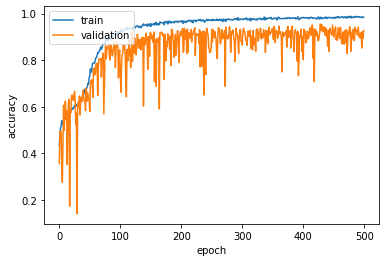

In [ ]:
abc='Accuracy vs Epoch Graph BatchNorm_250_(1)'
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.title('Epoch vs Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc='upper left')
#plt.savefig(f'/mydrive/dataset/Images_(1)/{abc}.png',bbox_inches="tight",dpi=520)
#make sure plt,=.savefig is before
plt.show()

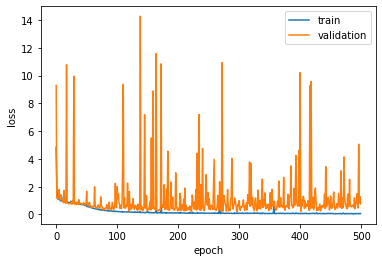

In [ ]:
abc='Loss vs Epoch GraphBatchNorm_250_(1)'
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('Epoch vs Accuracy Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc='upper right')
#plt.savefig(f'/mydrive/dataset/Images_(1)/{abc}.png',bbox_inches="tight",dpi=520)
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = valid_datagen.flow_from_directory(
        r'/content/drive/MyDrive/3200/AZ/Alzheimer_s Dataset/test',
        target_size=(200,200),
        color_mode='grayscale',
        batch_size=64,
        class_mode='categorical',
        shuffle=False,
        seed=42)

test_imgs, test_labels = next(test_generator)

Found 1279 images belonging to 4 classes.


In [ ]:
predictions = model.predict(x=test_generator, verbose=0)
np.round(predictions)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
import sklearn    
from sklearn.metrics import confusion_matrix

y_true=test_generator.classes
y_pred=np.argmax(predictions, axis=-1)

cm = confusion_matrix(y_true, y_pred)

In [ ]:
#print(cm_plot_labels)

Confusion matrix, without normalization
[[106   0  18  55]
 [  0   8   0   4]
 [ 22   0 434 184]
 [ 43   0  49 356]]


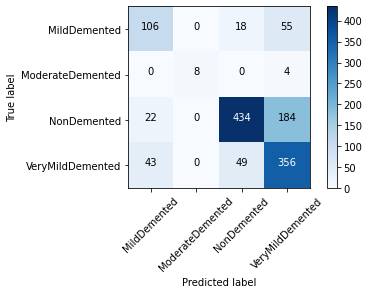

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)
abc='Confusion Matrix_BatchNorm250_(1)'
#plt.savefig(f'/mydrive/dataset/Images_(1)/confusion_(1)/{abc}.png',bbox_inches="tight",dpi=520)

In [ ]:
from sklearn.metrics import accuracy_score

print('Prediction Accuracy:', "{:.2f}".format(100*accuracy_score(y_true, y_pred))+"%")

Prediction Accuracy: 70.68%


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import classification_report

class_labels = list(test_generator.class_indices.keys())
report = classification_report(
    y_true,
    y_pred,
    target_names=class_labels)
print(report)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
                  precision    recall  f1-score   support

    MildDemented       0.62      0.59      0.61       179
ModerateDemented       1.00      0.67      0.80        12
     NonDemented       0.87      0.68      0.76       640
VeryMildDemented       0.59      0.79      0.68       448

        accuracy                           0.71      1279
       macro avg       0.77      0.68      0.71      1279
    weighted avg       0.74      0.71      0.71      1279



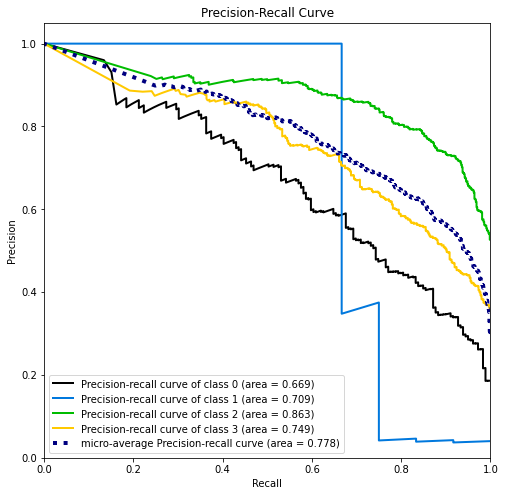

In [ ]:
skplt.metrics.plot_precision_recall(
    y_true,
    predictions,
    figsize=(8,8))
abc='Precision Recall BatchNorm_250_(1)'
#plt.savefig(f'/mydrive/dataset/Images_(1)/precision_(1)/{abc}.png',bbox_inches="tight",dpi=520)

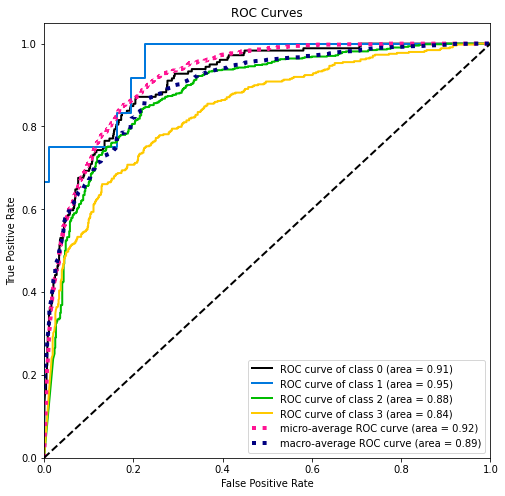

In [ ]:
skplt.metrics.plot_roc(
    y_true,
    predictions,
    figsize=(8,8))
abc='ROC Curve BatchNorm_250_(1)'
#plt.savefig(f'/mydrive/dataset/Images_(1)/roc_(1)/{abc}.png',bbox_inches="tight",dpi=520)

In [ ]:
from keras.utils import to_categorical

val= to_categorical(test_generator.classes)
print(val)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
def top_n_accuracy(preds, truths, n):
    best_n = np.argsort(preds, axis=-1)[:,-n:]
    ts = np.argmax(truths, axis=1)
    successes = 0
    for i in range(ts.shape[0]):
      if ts[i] in best_n[i,:]:
        successes += 1
    return float(successes)/ts.shape[0]

print('Top 2 Accuracy:', "{:.2f}".format(100*top_n_accuracy(preds=predictions, truths=val, n=2))+"%")

Top 2 Accuracy: 93.28%
